<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/2DHeat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
import pylab as pl
from IPython import display
import time

In [36]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [37]:
#Parameters
rho = 1
cp = 1

In [38]:
#space domain
Lx = 10
Ly = 10
Nx = 50
Ny = 50
dx = Lx/Nx
dy = Ly/Ny

#time domain
Nt = 500

#CFL
c = 1
C = 0.05
dt = C*dx/c

In [39]:
#Field Variables.
T = np.zeros((Nx,Ny))

x = np.linspace(0,Lx,50)
y = np.linspace(0,Ly,50)

In [40]:
X,Y = np.meshgrid(x,y)

In [54]:
#Initial Condition
t = 0
T[:,:] = 0

In [55]:
#Defining Thermal conductivity as a function of space
K = np.ones(np.shape(T))

K[20:26,30:36] = 0.001

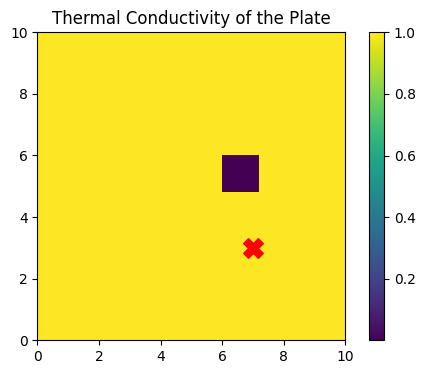

In [66]:
plt.figure(figsize=(6,4))
plt.style.use('default')
plt.imshow(K, extent=[0,10,0,10])
plt.colorbar()
plt.title('Thermal Conductivity of the Plate')
plt.scatter(7,3,color='red',marker='X',s=200)

In [50]:
#LOOP

time = np.arange(0,10,dt)

Text(0.5, 1.0, 'Initial Temperature Distribution (T=0 C)')

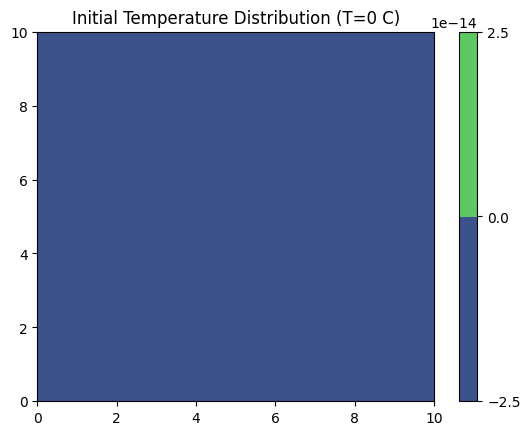

In [75]:
plt.contourf(X,Y,T)
plt.colorbar()
plt.title('Initial Temperature Distribution (T=0 C)')

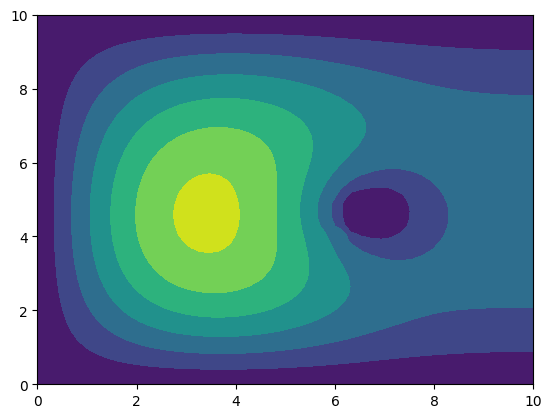

In [76]:



for n in range(1,len(time)):

  # plt.clf()

  t = t + dt

  Tc = T

  for i in range(1,(Nx-1)):

    for j in range(1,(Ny - 1)):

      T[i,j] = Tc[i,j] + (dt*K[i,j]/(rho*cp))*((Tc[i-1,j] + Tc[i,j-1] -4*Tc[i,j] + Tc[i+1,j] + Tc[i,j+1])/(dx**2))

  
  #Source Term
  # Sx = np.round(7*Nx/Lx) 
  # Sy = np.round(3*Ny/Ly)

  if t<5:

    T[7,3] = T[7,3] + dt*1000/(rho*cp)
  
  #Boundary conditions

  #Dirichlet
  T[0,:] = 0
  T[49,:] = 0
  T[:,0] = 0

  #Neuman
  T[:,-1] = T[:,-2]

  plt.contourf(X,Y,T)





  

Text(0.5, 1.0, 'Final Temperature Distribution')

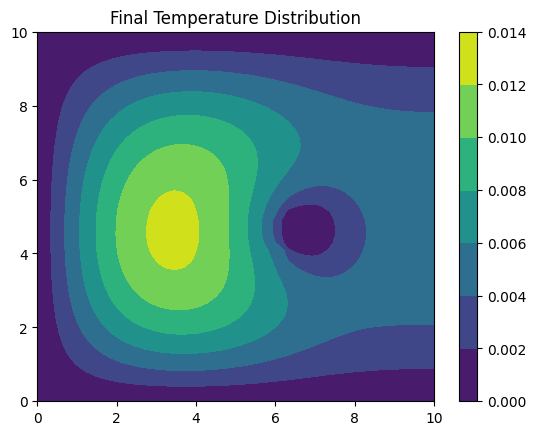

In [79]:
plt.contourf(X,Y,T)
plt.colorbar()
plt.title('Final Temperature Distribution')